<a href="https://colab.research.google.com/github/yashvyas1405/helloworld/blob/master/AI_Dockship_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
train = pd.read_csv('TRAIN.csv')

In [141]:
train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [143]:
train.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [144]:
#Date_time column
train['date_time'] = pd.to_datetime(train['date_time'])

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            38563 non-null  datetime64[ns]
 1   holiday              38563 non-null  object        
 2   temp                 38563 non-null  float64       
 3   rain_1h              38563 non-null  float64       
 4   snow_1h              38563 non-null  float64       
 5   clouds_all           38563 non-null  int64         
 6   weather_main         38563 non-null  object        
 7   weather_description  38563 non-null  object        
 8   traffic_volume       38563 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.6+ MB


In [146]:
train['Year'] = train['date_time'].dt.year
train['Month'] = train['date_time'].dt.month
train['Day'] = train['date_time'].dt.day
train['Hour'] = train['date_time'].dt.hour
train['Minutes'] = train['date_time'].dt.minute
train['Seconds'] = train['date_time'].dt.second

In [147]:
# Eliminating date time
train.drop(['date_time'], axis = 1, inplace = True)

In [148]:
train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Day,Hour,Minutes,Seconds
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0


In [149]:
#Categorical variables = holiday, weather main, weather description
num_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']


EDA

In [150]:
import seaborn as sns

<Figure size 1440x2880 with 0 Axes>

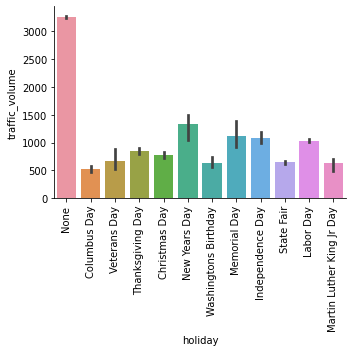

In [151]:
plt.figure(figsize=(20,40))
sns.catplot(y="traffic_volume", x="holiday",
                 data=train, kind="bar")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

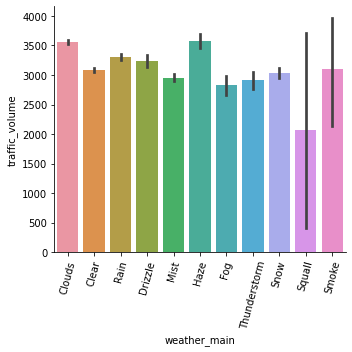

In [152]:
plt.figure(figsize=(20,10))
sns.catplot(y="traffic_volume", x="weather_main",
                 data=train, kind="bar")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Weather Description

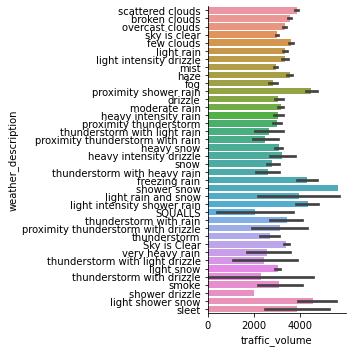

In [153]:
fig_dims =(20,4) 
sns.catplot(y="weather_description", x="traffic_volume",
                 data=train, kind="bar")
plt.tight_layout()
plt.show()

In [154]:
train['weather_description'].describe()

count            38563
unique              38
top       sky is clear
freq              8848
Name: weather_description, dtype: object

Applying one hot encoding

In [155]:
holi = pd.get_dummies(train.holiday, prefix = 'holiday', drop_first=True)
holi.head()

,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [156]:
main = pd.get_dummies(train.weather_main, prefix = 'weather_main', drop_first=True)
main.head()

,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [157]:
description = pd.get_dummies(train.weather_description, prefix = 'weather_description', drop_first=True)
description.head()

,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
train_data = pd.concat([train, description, main, holi], axis = 1)

In [159]:
train_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Day,Hour,Minutes,Seconds,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Drop the columns

In [160]:
train_data.drop(['holiday', 'weather_main', 'weather_description'], axis = 1, inplace = True)
train_data.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Year,Month,Day,Hour,Minutes,Seconds,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,288.28,0.0,0.0,40,5545,2012,10,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,289.36,0.0,0.0,75,4516,2012,10,2,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,289.58,0.0,0.0,90,4767,2012,10,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,290.13,0.0,0.0,90,5026,2012,10,2,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,291.14,0.0,0.0,75,4918,2012,10,2,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Numerical Variables

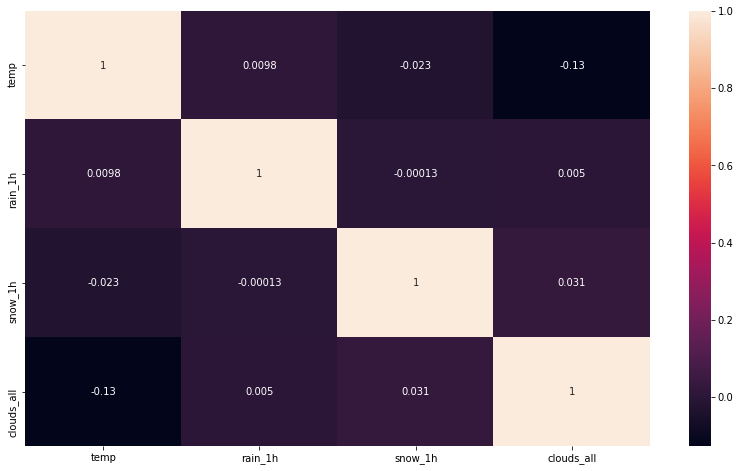

In [161]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

TEST DATA

In [162]:
test = pd.read_csv('TEST.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            9641 non-null   object 
 1   holiday              9641 non-null   object 
 2   temp                 9641 non-null   float64
 3   rain_1h              9641 non-null   float64
 4   snow_1h              9641 non-null   float64
 5   clouds_all           9641 non-null   int64  
 6   weather_main         9641 non-null   object 
 7   weather_description  9641 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 602.7+ KB


In [163]:
test.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

In [164]:
test['date_time'] = pd.to_datetime(test['date_time'])

test['Year'] = test['date_time'].dt.year
test['Month'] = test['date_time'].dt.month
test['Day'] = test['date_time'].dt.day
test['Hour'] = test['date_time'].dt.hour
test['Minutes'] = test['date_time'].dt.minute
test['Seconds'] = test['date_time'].dt.second

test.drop(['date_time'], axis = 1, inplace = True)

holi = pd.get_dummies(train.holiday, prefix = 'holiday', drop_first=True)
holi.head()

main = pd.get_dummies(train.weather_main, prefix = 'weather_main', drop_first=True)
main.head()

description = pd.get_dummies(train.weather_description, prefix = 'weather_description', drop_first=True)
description.head()

test_data = pd.concat([test, description, main, holi], axis = 1)

test_data.drop(['holiday', 'weather_main', 'weather_description'], axis = 1, inplace = True)
test_data.head()

,temp,rain_1h,snow_1h,clouds_all,Year,Month,Day,Hour,Minutes,Seconds,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,274.75,0.0,0.0,90.0,2017.0,11.0,1.0,20.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,274.75,0.0,0.0,90.0,2017.0,11.0,1.0,20.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,274.79,0.0,0.0,90.0,2017.0,11.0,1.0,21.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,274.79,0.0,0.0,90.0,2017.0,11.0,1.0,21.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,275.08,0.0,0.0,90.0,2017.0,11.0,1.0,22.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


x and y

In [165]:
train_data.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'Year',
       'Month', 'Day', 'Hour', 'Minutes', 'Seconds',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_freezing rain',
       'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weather_description_light intensity shower rain',
       'weather_description_light rain',
       'weather_description_light rain and snow',
       'weather_description_light shower snow',
       'weather_description_light snow', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_proximity shower rain',
    

In [166]:
X = train_data.loc[:, ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Year',
       'Month', 'Day', 'Hour', 'Minutes', 'Seconds',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_freezing rain',
       'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weather_description_light intensity shower rain',
       'weather_description_light rain',
       'weather_description_light rain and snow',
       'weather_description_light shower snow',
       'weather_description_light snow', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_proximity shower rain',
       'weather_description_proximity thunderstorm',
       'weather_description_proximity thunderstorm with drizzle',
       'weather_description_proximity thunderstorm with rain',
       'weather_description_scattered clouds',
       'weather_description_shower drizzle', 'weather_description_shower snow',
       'weather_description_sky is clear', 'weather_description_sleet',
       'weather_description_smoke', 'weather_description_snow',
       'weather_description_thunderstorm',
       'weather_description_thunderstorm with drizzle',
       'weather_description_thunderstorm with heavy rain',
       'weather_description_thunderstorm with light drizzle',
       'weather_description_thunderstorm with light rain',
       'weather_description_thunderstorm with rain',
       'weather_description_very heavy rain', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke',
       'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm',
       'holiday_Columbus Day', 'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_None', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday']]

In [167]:
y = train_data.loc[:, 'traffic_volume']
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

Model Building

In [168]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [169]:
#Random Forest
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
Y_pred = reg_rf.predict(X_test)
acc_random_forest = round(reg_rf.score(X_train, y_train) * 100, 2)

In [170]:
#Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [171]:
results = pd.DataFrame({
    'Model' : ['Random Forest', 'Decision Tree'],
    'Score' : [acc_random_forest, acc_decision_tree]
})
results_df = results.sort_values(by='Score', ascending = False)
results_df = results_df.set_index('Score')
results_df.head()

,Model
Score,
100.00,Decision Tree
97.61,Random Forest


Therefore we choose decision tree.

Decision Tree

In [172]:
y_pred = decision_tree.predict(X_test)

In [173]:
decision_tree.score(X_train, y_train)

1.0

In [174]:
decision_tree.score(X_test, y_test)

0.6801935073561057

Random Forest

In [175]:
y_pred = reg_rf.predict(X_test)

In [176]:
reg_rf.score(X_train, y_train)

0.9761000554951399

In [177]:
reg_rf.score(X_test, y_test)

0.8303732377102638

Feature: 0, Score: 0.07352
Feature: 1, Score: 0.00639
Feature: 2, Score: 0.00007
Feature: 3, Score: 0.01467
Feature: 4, Score: 0.01814
Feature: 5, Score: 0.02369
Feature: 6, Score: 0.04848
Feature: 7, Score: 0.78445
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00087
Feature: 11, Score: 0.00262
Feature: 12, Score: 0.00048
Feature: 13, Score: 0.00162
Feature: 14, Score: 0.00052
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00065
Feature: 17, Score: 0.00021
Feature: 18, Score: 0.00042
Feature: 19, Score: 0.00041
Feature: 20, Score: 0.00058
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00135
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00058
Feature: 26, Score: 0.00142
Feature: 27, Score: 0.00079
Feature: 28, Score: 0.00248
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00033
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00015
Feature: 33, Score: 0.00227
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

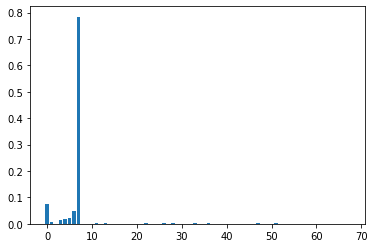

In [178]:
import matplotlib.pyplot as plt

importance = reg_rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [179]:
importances = pd.DataFrame({
    'feature':X_train.columns,
    'importance':np.round(reg_rf.feature_importances_,3)
    })
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Hour,0.784
temp,0.074
Day,0.048
Month,0.024
Year,0.018
clouds_all,0.015
rain_1h,0.006
weather_main_Clouds,0.003
weather_description_broken clouds,0.003


In [180]:
X_new = X.loc[:, ['Hour', 'temp', 'Day', 'Month', 'Year', 'clouds_all', 'rain_1h', 'weather_main_Clouds', 'weather_description_broken clouds', 'weather_description_sky is clear']]

In [181]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [182]:
random_f = RandomForestRegressor()
random_f.fit(X_new_train, y_train)

Y_pred = random_f.predict(X_new_test)
acc_random_forest = round(random_f.score(X_new_train, y_train) * 100, 2)

In [183]:
y_pred = random_f.predict(X_new_test)

In [184]:
random_f.score(X_new_train, y_train)

0.9784125445929694

In [185]:
random_f.score(X_new_test, y_test)

0.8441076013394576

Random Forest

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
#NUmber of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#number of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#min nuber of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#min number od samples req at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [188]:
#Create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [195]:
# Using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = random_f, param_distributions = random_grid, n_iter = 10, cv= 5, verbose = 2, random_state = 42, n_jobs = 1)

In [196]:
rf_random.fit(X_new_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  26.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 20.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [197]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [202]:
random_f_new = RandomForestRegressor(**(rf_random.best_params_))
random_f_new.fit(X_new_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [203]:
Y_pred = random_f_new.predict(X_new_test)
acc_random_forest = round(random_f_new.score(X_new_train, y_train) * 100, 2)

In [208]:
y_predic = random_f_new.predict(X_new_test)

In [206]:
random_f_new.score(X_new_train, y_train)

0.9808884174889652

In [207]:
random_f_new.score(X_new_test, y_test)

0.8756973805181398

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


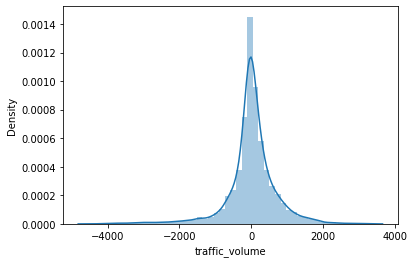

In [209]:
sns.distplot(y_test-y_predic)

Creating the final output

In [215]:
y_test.head(3)

35123    4492
25186       0
32803    6571
Name: traffic_volume, dtype: int64

In [220]:
final = pd.DataFrame({
        "Value": y_test
    })
final.head(5)

,Value
35123,4492
25186,0
32803,6571
14902,688
35146,4254


In [221]:
final.reset_index(level=0, inplace=True)

In [226]:
final.head(3)

,index,Value
0,35123,4492
1,25186,0
2,32803,6571


In [224]:
final.to_csv('Final_.csv', index = False)